In [3]:
%cd "C:\Users\LiuJinbao\Documents\Code\PlasmaChemistry"

C:\Users\LiuJinbao\Documents\Code\PlasmaChemistry


In [4]:
import time
import timeit
import math

import numpy as np
import timeit
import numba as nb
import importlib

In [11]:
_number = int(2e3)

with open("_cache/cache.txt") as f:
    multi_expr = [_.strip() for _ in f.readlines()]


multi_expr_compiled = compile(f"[{','.join(multi_expr)}]",'<string>','eval')

In [12]:
multi_expr

['(1)*((5.75e+15*1.66e-30)*Tgas**(-0.7485)*exp(-28341/Tgas))*exp(min(0*(0.54),(56319*0.5032))/Tgas)',
 '(1)*((5.75e+15*1.66e-30)*Tgas**(-0.7485)*exp(-28341/Tgas))*exp(min(3380*(0.54),(56319*0.5032))/Tgas)',
 '(1)*((5.75e+15*1.66e-30)*Tgas**(-0.7485)*exp(-28341/Tgas))*exp(min(6724*(0.54),(56319*0.5032))/Tgas)',
 '(1)*((5.75e+15*1.66e-30)*Tgas**(-0.7485)*exp(-28341/Tgas))*exp(min(10032*(0.54),(56319*0.5032))/Tgas)',
 '(1)*((5.75e+15*1.66e-30)*Tgas**(-0.7485)*exp(-28341/Tgas))*exp(min(13304*(0.54),(56319*0.5032))/Tgas)',
 '(1)*((5.75e+15*1.66e-30)*Tgas**(-0.7485)*exp(-28341/Tgas))*exp(min(16541*(0.54),(56319*0.5032))/Tgas)',
 '(1)*((5.75e+15*1.66e-30)*Tgas**(-0.7485)*exp(-28341/Tgas))*exp(min(19741*(0.54),(56319*0.5032))/Tgas)',
 '(1)*((5.75e+15*1.66e-30)*Tgas**(-0.7485)*exp(-28341/Tgas))*exp(min(22906*(0.54),(56319*0.5032))/Tgas)',
 '(1)*((5.75e+15*1.66e-30)*Tgas**(-0.7485)*exp(-28341/Tgas))*exp(min(26035*(0.54),(56319*0.5032))/Tgas)',
 '(1)*((5.75e+15*1.66e-30)*Tgas**(-0.7485)*exp(-2834

In [15]:
%timeit eval(multi_expr_compiled,{"__builtins__":__builtins__,"exp":math.exp,"sqrt":math.sqrt,"Tgas":2000})

7.04 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
with open(r"_cache/cache_template.py") as f:
    _str = f.readlines()
_str = "".join(_str)
_list = [f"value[{i}] = {_}" for i,_ in enumerate(multi_expr)]
_multi_expr_str = "\n    ".join(_list)

In [22]:
_str_to_write = _str.replace('"""__REPLACE__"""', f"{_multi_expr_str}")

In [23]:
with open(r"_cache/cache.py", "r+") as f:
    f.seek(0)
    f.truncate()
    f.write(_str_to_write)

In [ ]:
start = time.time()
from _cache import cache
import importlib
importlib.reload(cache)
end = time.time()

In [50]:
a = np.zeros(_number)
cache.test(a, 3000.0)

In [49]:
print(f"{end-start:.1f} s")

179.5 s


In [51]:
%timeit cache.test(a, 3000)

3.6 µs ± 6.01 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


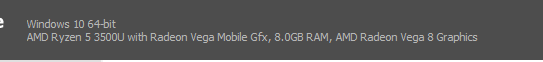
8000 reactions

(numpy)exec time   :   4.4 ms

(numba)exec time   :   3.6 us

1000 higher speed

compile time   : 179.5  s